In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/NLP-movie-review.csv')

# Data Preprocessing

In [ ]:
df.head()

,review,reaction
0,Service is friendly and inviting.,1
1,Awesome service and food.,1
2,Waitress was a little slow in service.,0
3,"Come hungry, leave happy and stuffed!",1
4,Horrible - don't waste your time and money.,0


In [ ]:
df.isnull().sum()

review      0
reaction    0
dtype: int64

In [ ]:
df.reaction.value_counts()

1    500
0    500
Name: reaction, dtype: int64

In [ ]:
df['reaction'].replace(to_replace=1,value='positive',inplace=True)
df['reaction'].replace(to_replace=0,value='negative',inplace=True)

In [ ]:
df.head()

,review,reaction
0,Service is friendly and inviting.,positive
1,Awesome service and food.,positive
2,Waitress was a little slow in service.,negative
3,"Come hungry, leave happy and stuffed!",positive
4,Horrible - don't waste your time and money.,negative


# VECTORIZING THE DATA

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf= TfidfVectorizer(lowercase=True,stop_words='english',token_pattern='\w+')

In [ ]:
X= tf_idf.fit_transform(df['review'].values)

In [ ]:
X = pd.DataFrame(X.todense(),columns=tf_idf.get_feature_names_out())
print('Vocabulary length of count-vectorized data',len(X))

Vocabulary length of count-vectorized data 1000


In [ ]:
X

,00,1,10,100,11,12,15,17,1979,2,...,year,years,yellow,yellowtail,yelpers,yucky,yukon,yum,yummy,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Split the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y=df["reaction"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
pd.DataFrame(data={"Actual":y_test,"Pred":y_pred})

,Actual,Pred
521,positive,positive
737,negative,negative
740,positive,negative
660,positive,positive
411,negative,positive
...,...,...
468,positive,positive
935,positive,positive
428,positive,positive
7,positive,positive


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n    negative       0.78      0.64      0.71       152\n    positive       0.69      0.81      0.75       148\n\n    accuracy                           0.73       300\n   macro avg       0.73      0.73      0.73       300\nweighted avg       0.73      0.73      0.72       300\n'

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


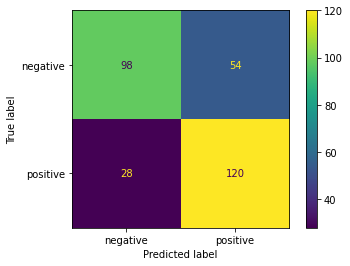

In [ ]:
plot_confusion_matrix(model,X_test,y_test)